In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Output folder
OUTDIR = "output/digitization"
os.makedirs(OUTDIR, exist_ok=True)

%matplotlib inline


In [39]:
def make_digitization_figure(freq=2.0, fs=10.0, cycles=1.2, amp=1.0, phase=0.0, outdir=OUTDIR,
                              title="Digitization of Audio Signal"):
    """
    Generate an analog-vs-discrete sampling diagram and save to PNG+SVG.

    Parameters
    ----------
    freq : float
        Frequency of the sine (Hz) used as the analog reference.
    fs : float
        Sampling rate (Hz) for the discrete samples.
    cycles : float
        Number of sine cycles to display in the figure.
    amp : float
        Amplitude of the sine wave.
    phase : float
        Phase offset (radians).
    outdir : str
        Where to save the figure files.
    title : str
        Title atop the plot.
    """
    os.makedirs(outdir, exist_ok=True)

    # High-rate "analog" waveform
    t_end = cycles / freq
    fs_ref = 5000.0
    t_ref = np.arange(0, t_end, 1.0/fs_ref)
    x_ref = amp * np.sin(2*np.pi*freq*t_ref + phase)

    # Discrete samples
    n_samples = int(np.floor(fs * t_end))
    n = np.arange(n_samples)
    t_s = n / fs
    x_s = amp * np.sin(2*np.pi*freq*t_s + phase)

    # Plot
    plt.figure(figsize=(9, 5))
    plt.plot(t_ref, x_ref, lw=2.5, label="Analog Signal")

    # # Sample stems
    for ti, xi in zip(t_s, x_s):
        plt.plot([ti, ti], [0, xi], ls="--", lw=1.0, alpha=0.6, color='black')

    # Sample points
    plt.plot(t_s, x_s, "o", ms=6, label="Samples")
    
    print("Points")
    comb = dict(zip(t_s, x_s))
    for x,y in comb.items():
        print(f"({round(x,3)}, {round(y, 3)})")

    # Formatting
    plt.title(title, pad=14)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.xlim(0, t_end)
    ylim = 1.15 * max(amp, 1e-9)
    plt.ylim(-ylim, ylim)
    plt.grid(alpha=0.2)
    plt.legend(loc="upper right")
    plt.tight_layout()

    # Save outputs
    png_path = os.path.join(outdir, "digitization_sampling.png")
    svg_path = os.path.join(outdir, "digitization_sampling.svg")
    plt.savefig(png_path, dpi=220)
    plt.savefig(svg_path)
    plt.show()
    print(f"Saved:\n  {png_path}\n  {svg_path}")


Points
(0.0, 0.0)
(0.005, 0.309)
(0.01, 0.588)
(0.015, 0.809)
(0.02, 0.951)
(0.025, 1.0)
(0.03, 0.951)
(0.035, 0.809)
(0.04, 0.588)
(0.045, 0.309)
(0.05, 0.0)
(0.055, -0.309)
(0.06, -0.588)
(0.065, -0.809)
(0.07, -0.951)
(0.075, -1.0)
(0.08, -0.951)
(0.085, -0.809)
(0.09, -0.588)
(0.095, -0.309)
(0.1, -0.0)
(0.105, 0.309)
(0.11, 0.588)
(0.115, 0.809)
(0.12, 0.951)
(0.125, 1.0)
(0.13, 0.951)
(0.135, 0.809)
(0.14, 0.588)
(0.145, 0.309)
(0.15, 0.0)
(0.155, -0.309)
(0.16, -0.588)
(0.165, -0.809)
(0.17, -0.951)
(0.175, -1.0)
(0.18, -0.951)
(0.185, -0.809)
(0.19, -0.588)
(0.195, -0.309)


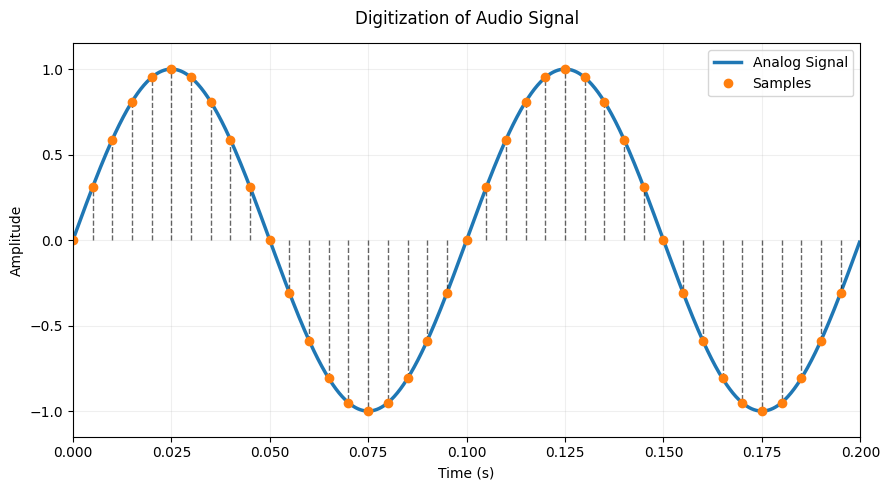

Saved:
  output/digitization/digitization_sampling.png
  output/digitization/digitization_sampling.svg


In [40]:
# Example: well-sampled waveform (fs > 2*freq)
make_digitization_figure(freq=10, fs=200.0, cycles=2, amp=1.0, phase=0.0)